In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from os import path
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Import Data

In [2]:
#Import the raw Excel file
excel_Album =  pd.ExcelFile('data/good kid, mAAD city.xlsx') 

In [3]:
#Pull the first tab
df_Album = excel_Album.parse(0)

In [4]:
#Brief view of the data imported
df_Album.head()

,Song,Detail,Lyric,Duration
0,Sherane a.k.a Master Splinter's Daughter,Intro Skit,Lord God\nI come to you a sinner\nAnd I humbly...,63
1,Sherane a.k.a Master Splinter's Daughter,Body,I met her at this house party on El Segundo an...,131
2,Sherane a.k.a Master Splinter's Daughter,Outro Skit,Please leave your message for 323-\nRecord you...,79
3,"Bitch, Don't Kill My Vibe",Body,I am a sinner who's probably gonna sin again\n...,303
4,"Bitch, Don't Kill My Vibe",Outro Skit,"Aye, K-Dot, get in the car, nigga!\nCome on, w...",7


# Divide Rap Lyrics and Skit Lyrics

In [5]:
#The lyrics were divided between different type of skits and non-skits (flagged as 'Body')
#Divided up the rap lyrics and the skit lyrics into two different dataframes
df_RapLyrics = df_Album.loc[df_Album['Detail'] == 'Body']
df_SkitLyrics = df_Album.loc[df_Album['Detail'] != 'Body']

In [6]:
df_RapLyricsWordsOnly = df_RapLyrics['Lyric']
df_SkitLyricsWordsOnly = df_SkitLyrics['Lyric']

In [7]:
#To get a word cloud from the lyrics, they need to be in one giant string
RapLyricsWordsOnly = df_RapLyricsWordsOnly.str.cat(sep='|')
SkitLyricsWordsOnly = df_SkitLyricsWordsOnly.str.cat(sep='|')

# General View Of Unfiltered Lyrics

In [42]:
#Import stop words
stopwords = set(STOPWORDS)

In [9]:
#Prep the rap lyrics to make a word cloud
RapLyricsWC = WordCloud(max_words=1000, stopwords=stopwords, margin=10,
               random_state=1).generate(RapLyricsWordsOnly)
SkitLyricsWC = WordCloud(max_words=1000, stopwords=stopwords, margin=10,
               random_state=1).generate(SkitLyricsWordsOnly)

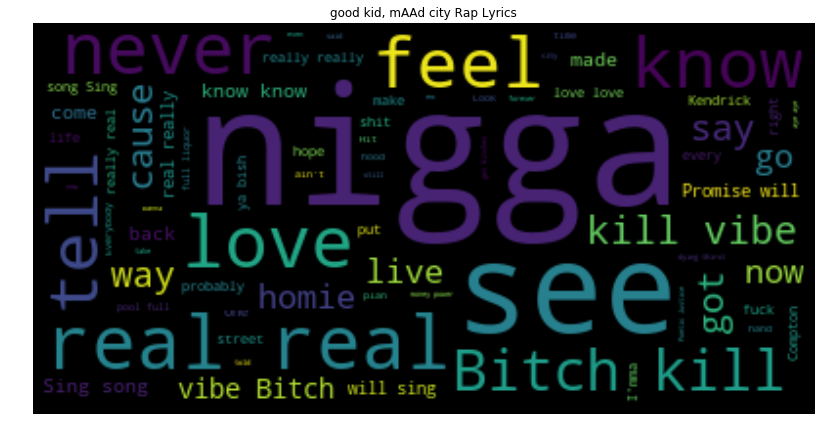

In [10]:
#Create the word cloud
default_colors = RapLyricsWC.to_array()
plt.figure(figsize=(14,12))
plt.title("good kid, mAAd city Rap Lyrics")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()
RapLyricsWC.to_file("images/RapLyricsOnly_v01.png")

- The word cloud didn't turn out well
- Explicit words made a large impact on the overall image
- The chorus from "Real" also made a big impact since it was highly repetitive
- There are a few promising words that stood out such as "love" and "sing"

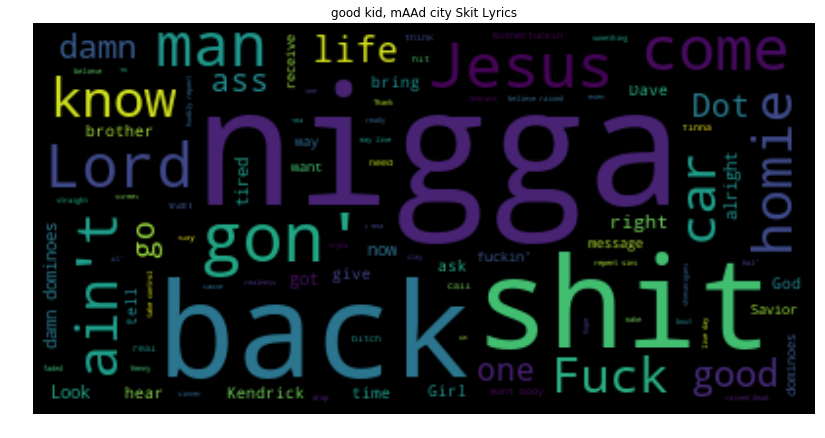

In [11]:
#Create the word cloud
default_colors = SkitLyricsWC.to_array()
plt.figure(figsize=(14,12))
plt.title("good kid, mAAd city Skit Lyrics")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()
SkitLyricsWC.to_file("images/SkitLyricsOnly_v01.png")

In [12]:
import nltk
from collections import Counter

In [13]:
rap_token = nltk.word_tokenize(RapLyricsWordsOnly)
skit_token = nltk.word_tokenize(SkitLyricsWordsOnly)

In [14]:
#The top 20 words are not valid. There are characters and unimportant words like "I", "you", "the".
Counter(skit_token).most_common(20)

[(',', 151),
 ('I', 74),
 ('you', 65),
 ('the', 50),
 ('.', 45),
 ('that', 44),
 ("'", 44),
 ('?', 37),
 ('my', 35),
 ('!', 35),
 ('to', 32),
 ("''", 29),
 ('nigga', 25),
 ('back', 23),
 ('your', 22),
 ("n't", 22),
 ('of', 19),
 (')', 19),
 ('gon', 18),
 ('(', 18)]

In [40]:
from nltk.corpus import stopwords

In [16]:
#Creates a filter using the English language to be used later
cachedStopWords = set(stopwords.words("english"))

In [17]:
#Tokenize the lyrics. Breaks each group of strings into an array of strings.
rap_tokens = [w for w in nltk.word_tokenize(RapLyricsWordsOnly.lower())
        if w.isalpha()]
skit_tokens = [w for w in nltk.word_tokenize(SkitLyricsWordsOnly.lower())
        if w.isalpha()]

In [18]:
#Circles through the lyrics to filter out generic words
rap_no_stops = [t for t in rap_tokens
        if t not in cachedStopWords]
skit_no_stops = [t for t in skit_tokens
        if t not in cachedStopWords]

In [49]:
#Top ten most common words for the rap lyrics
common_rap = Counter(rap_no_stops).most_common(10)
common_rap

[('know', 63),
 ('love', 59),
 ('real', 53),
 ('got', 50),
 ('like', 45),
 ('get', 43),
 ('really', 43),
 ('sing', 40),
 ('say', 38),
 ('nigga', 35)]

In [50]:
#Top ten most common words for the skit lyrics
common_skit = Counter(skit_no_stops).most_common(10)
common_skit

[('nigga', 33),
 ('back', 23),
 ('shit', 21),
 ('gon', 18),
 ('jesus', 15),
 ('come', 14),
 ('damn', 14),
 ('lord', 13),
 ('man', 13),
 ('get', 11)]

In [54]:
rap_no_stops

['met',
 'house',
 'party',
 'el',
 'segundo',
 'central',
 'credentials',
 'strippers',
 'atlanta',
 'ass',
 'came',
 'hump',
 'jump',
 'camel',
 'want',
 'ride',
 'like',
 'arabians',
 'push',
 'hello',
 'name',
 'kendrick',
 'said',
 'handsome',
 'whispered',
 'ear',
 'disappeared',
 'found',
 'dancing',
 'ciara',
 'played',
 'background',
 'parade',
 'music',
 'made',
 'us',
 'wearing',
 'shades',
 'cool',
 'stay',
 'said',
 'street',
 'dominguez',
 'high',
 'okay',
 'know',
 'borderline',
 'compton',
 'paramount',
 'well',
 'compton',
 'replied',
 'quickly',
 'start',
 'batting',
 'eyes',
 'strictly',
 'wanted',
 'thighs',
 'around',
 'seventeen',
 'nothing',
 'pussy',
 'stuck',
 'mental',
 'motive',
 'rather',
 'sinful',
 'trying',
 'get',
 'tell',
 'gave',
 'nextel',
 'dropped',
 'number',
 'chirped',
 'whole',
 'summer',
 'well',
 'summer',
 'passed',
 'liking',
 'conversation',
 'probably',
 'enticing',
 'could',
 'imagine',
 'maybe',
 'actions',
 'would',
 'end',
 'wifing',
 